# Aviation Data Analysis

## Introduction
In modern medicine, organ transplants are frequently done in order to replace a patients failing or failed organs. Often, doctors are able to identify issues of bodily failure early on and schedule a date and time for an organ transplant operation. Under these circumstances, transportation of the organ via truck or helicopter, is suitable as the patient has time before their organ fails or ruptures. In more time sensitive cases, like trauma or late identification of organ failure, more emergency measures are needed. In these certain scenarios, a patient may need an organ within 24 hours and the only availability is greater than 500 miles away. Based on this necessary service and opening in the market, the hospital network Geisinger Permanente has decided to open up a subsidiary business called TransOrgo. TransOrgo will use airplanes to transport organs in time-dependent situations when the distance to the next available organ is greater than 500 miles away and the organ is needed within 12-24 hours. The owners of TransOrgo has assessed market conditions and deemed it to be a profitable business. Before purchasing any airplanes, the stakeholders of TransOrgo are asking for the data science team to conduct an analysis of incident data and determine the lowest risk airplanes to purchase. 

## The Data
The data we are using to conduct this analysis is aviation incident data from 1962 to 2023 from the National Transportation Safety Board. Below, we will provide a technical explanation of:
* How we handled the data
* The steps we took to process and clean the data
* The actions we took to reach my conclusions
* The methods we used to create visualizations for the data

## Importing the data for analysis

* We start by importing the entire Pandas Library as pd and import the 'Aviation.csv' file as a dataframe and call it 'aviation_data'.

In [1]:
import pandas as pd
aviation_data = pd.read_csv("../data/AviationData.csv", encoding='latin-1', low_memory=False)

## aviation_data.info()
The first thing we are going to do is use the pandas '.info()' method to print a concise summary of the aviation_data dataframe we just created. We are doing this to determine which columns we are going to use in our analysis. 

In [2]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Choosing Columns
to conduct our analysis, the column names we are going to use are:
* "Injury.Severity"
* "Aircraft.Category"
* "Make"
* "Model"
* "Amateur.Built"
* "Number.of.Engines"
* "Engine.Type"
* "Purpose.of.flight"
* "Weather.Condition"

The reason we chose these columns is because "Injury Severity" has useful values, such as "Serious" and "Fatal", which we are going to use to measure risk. Columns such as "Accident.Number" and "Publication.Date" are useless for this particular analysis because they provide little to no information to measure threat exposure. 
Now that we know which columns we make it a list of the aviation_data columns we are going to use to create a new dataframe with and attach it to a variable called "aviation_columns". 

In [3]:
aviation_columns = ['Injury.Severity', 'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
                   'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', "Weather.Condition"]

## New Dataframe

Since we may want to refer to the original 'aviation_data' dataframe, we are going to create a new dataframe with our desired columns, instead of editing our original dataframe and deleting columns. we are going to call this new dataframe 'aviation_processed'.

In [4]:
aviation_processed = aviation_data[aviation_columns]

## Cleaning the data: Aircraft

Now that we have our new dataframe 'aviation_processed' with our desired columns from the original dataframe, 'aviation_data', we are going to clean the data and get rid of some rows that we don't need. Looking into the 'Aircraft.Category' column using the .value_counts() method, we will see that there are more aircraft than just airplanes.

In [5]:
aviation_processed['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

## Cleaning the data: Removing unnecessary Aircraft

Because our company will only be utilizing airplanes for business, we can go ahead and delete any rows that aren't airplanes. To do this, we are going to utilize .loc method from Pandas in order to filter our 'Aircraft.Category' columns based on the label 'Airplane'. This will delete any rows in 'Aircraft.Category' which don't have the word 'Airplane'.

In [6]:
aviation_processed = aviation_processed.loc[
    aviation_processed['Aircraft.Category'] == "Airplane", 
    aviation_columns
]


Now when we check the values for the 'Aircraft.Category' column, we can see only 'Airplane'
appears

In [7]:
aviation_processed['Aircraft.Category'].value_counts()

Airplane    27617
Name: Aircraft.Category, dtype: int64

## Export current CSV file

We are going to the current datafile as a CSV file to show in tableau. 

In [8]:
#aviation_processed.to_csv('Aviation_airplane_filtered.csv', index=False)

## Cleaning the data: Amateur Built

Now that we have eliminated any rows that aren't Airplane incidents, we are then going to 
filter out the rows in the "Amateur.Built" column to delete any rows in which the airplane
build was amateur. Upon checking the values of our "Amateur.Built" category, we can see 
that it's broken down into "Yes", meaning the aircraft was amateur built, and "No", meaning
the aircraft was not amateur built.

In [9]:
aviation_processed['Amateur.Built'].value_counts()

No     24417
Yes     3183
Name: Amateur.Built, dtype: int64

## Cleaning the data: Amateur Built vs. Injury Severity

To show there is an actual statistical reason to only use non-amateur built airplanes, we are going to compare the "Amateur.Built" column with the "Injury.Severity" column. We first check the 'Injury.Severity' values using the .value_counts() method. 

In [10]:
aviation_processed['Injury.Severity'].value_counts()

Non-Fatal      21063
Fatal           4238
Fatal(1)         386
Fatal(2)         279
Incident         246
Minor            165
Serious          127
Fatal(3)          90
Fatal(4)          79
Fatal(5)          26
Fatal(6)          21
Unavailable       21
Fatal(7)          13
Fatal(8)          13
Fatal(10)          7
Fatal(12)          4
Fatal(13)          2
Fatal(154)         2
Fatal(17)          1
Fatal(16)          1
Fatal(169)         1
Fatal(131)         1
Fatal(19)          1
Fatal(26)          1
Fatal(35)          1
Fatal(54)          1
Fatal(24)          1
Fatal(160)         1
Fatal(27)          1
Fatal(113)         1
Fatal(9)           1
Fatal(11)          1
Fatal(125)         1
Fatal(65)          1
Fatal(14)          1
Fatal(18)          1
Fatal(20)          1
Fatal(97)          1
Fatal(228)         1
Name: Injury.Severity, dtype: int64

As we can see by the values of the "Injury.Severity" column, we are going to use the rows with values "Serious" and rows that start with "Fatal" to figure out what percentage of amateur built planes were either fatalities or serious incidents. The reason we are focusing on these components of the values is because "Serious" and "Fatal" incidents are more likely to destroy the airplane, as well as damage whatever the plane hits, kill the pilots and crew, and destroy the cargo. This leads not only to a loss of capital and life, it leads to a litany of legal issues that will cause significant financial stress on the company. 

First, we create a variable to group the 'aviation_processed' dataframe by the unique values in "Amateur.Built" and calculate summation of the values in the "Amateur.Built" column in which the "Injury.Severity" column has the value "Serious" or has a value that starts with the word "Fatal". We need to do this because the values in "Injury" Severity" contain values such as "Fatal, Fatal(0), Fatal(1), etc". 
Next, we create a variable called amateur_built_counts, which gives us a total count of each value in the "Amateur.Built" column, the values of which are either "Yes" or "No".
Finally, we create our "amateurbuilt_severity_percent" variable, which is a simple calculation to test what percentage of amateur built and non-amateur built planes were serious or fatal. 

In [11]:
amateur_severity = aviation_processed.groupby("Amateur.Built")['Injury.Severity'].apply(
    lambda x: ((x == "Serious") |  (x.str.startswith("Fatal"))).sum()
)

amateur_built_counts = aviation_processed['Amateur.Built'].value_counts()

amateurbuilt_severity_percent = (amateur_severity / amateur_built_counts) * 100

print("Percentage of Serious of Fatal incidents in Amateur Built and Non-Amateur Built airplanes:")

print(amateurbuilt_severity_percent.apply(lambda x: f"{x: .2f}%"))

Percentage of Serious of Fatal incidents in Amateur Built and Non-Amateur Built airplanes:
Amateur.Built
No      18.68%
Yes     23.31%
dtype: object


## Cleaning the data: Analysis of Amateur Built Airplanes Result

As we can see from the results, 23.31% of incidents involving an amateur built plane were serious or fatal, as opposed to non-amateur built airplanes, of which only 18.68% were serious or fatal. 
From this analysis, we can conclude that we should only use non-amateur built airplanes and will now remove all rows which contain amateur built airplanes in order to further clean our dataset. 

In [12]:
aviation_processed = aviation_processed.loc[aviation_processed["Amateur.Built"] == "No", aviation_columns]

Now we run a quick check using .value_counts() to make sure there are only "No" values in our "Amateur.Built" column.

In [13]:
aviation_processed['Amateur.Built'].value_counts()

No    24417
Name: Amateur.Built, dtype: int64

## Recommendation #1: Weather Condition

Now we will show our analysis of how we found our first recommendation, which is to raise the cost of transportation when weather is IMC. In this dataset, "Weather Condition" is broken down into two categories: VMC and IMC. VMC stands for Visual Meteorologic Conditions and is used to describe weather in which the visibility is good enough to allow pilots to use their visual information to fly. IMC stands for Instrument Meteorologic Conditions and is used to describe weather in which the visibility is low enough that the pilot cannot use their visual information and must rely solely on their instruments. 
When we look at the values of "Weather Condition", we see that it has some unnecessary values "Unknown" and "UNK", so the first thing we will do is get rid of those rows to clean up our data and get a more accurate analysis. 

In [14]:
aviation_processed['Weather.Condition'].value_counts()

VMC    19711
IMC     1363
Unk      215
UNK      149
Name: Weather.Condition, dtype: int64

In [15]:
aviation_processed = aviation_processed.loc[
    (aviation_processed['Weather.Condition'] != "UNK") & 
    (aviation_processed['Weather.Condition'] != "Unk")
]


## Weather Condition vs. Injury Severity

Now that our dataset is narrowed down to the two categories "IMC" and "VMC", we are going to run a proportional analysis to test what percentage of "IMC" weather and "VMC" weather incidents were "Serious" or "Fatal". First we create a variable called weather_severity to group the data by the "Weather.Condition" column and get a summation of each value in the "Weather.Condition" column in which the "Injury Severity" column also is equal to "Serious" or starts with the word "Fatal". We then create another variable called weather_cond_total to get a total count of each value in the "Weather Condition" column. Lastly, we create one more variable that runs a simple calculation to find the percentage of each "Weather Condition" value is "Serious" or "Fatal" and we print our answer. 

In [16]:
weather_severity = aviation_processed.groupby("Weather.Condition")['Injury.Severity'].apply(
    lambda x: ((x == "Serious") |  (x.str.startswith("Fatal"))).sum()
)
weather_cond_total = aviation_processed['Weather.Condition'].value_counts()

weather_severity_percent = (weather_severity / weather_cond_total) * 100

print("Percentage of Serious of Fatal incidents in VMC and IMC weather conditions:")

print(weather_severity_percent.apply(lambda x: f"{x: .2f}%"))

Percentage of Serious of Fatal incidents in VMC and IMC weather conditions:
IMC     55.91%
VMC     13.80%
dtype: object


## Weather Condition vs. Injury Severity Results

As we can see from the results, Incidents in which weather conditions were IMC resulted in "Serious" or "Fatal" incidents 55.91% of the time, while incidents that occurred during VMC weather conditions only resulted in "Serious" or "Fatal" incidents 13.80% of the time. This is a large disparity and shows the huge impact weather has on airline incidents. In order to compensate for the financial risk of flying during IMC weather conditions, our first recommendation is to raise prices during these circumstances. Because TransOrgo is an emergency service, we must be able to supply the cargo in any context, but in order to justify our calculated risk of flying during IMC conditions, we must increase prices on these specific trips.

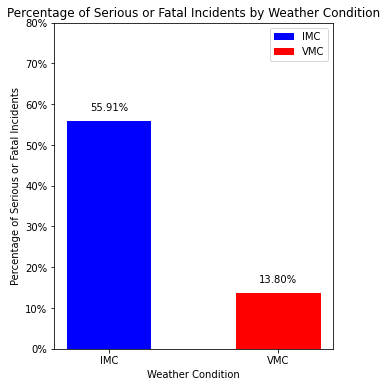

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
weather_conditions = weather_severity_percent.index.tolist()
weathercond_severity_percent = weather_severity_percent
fig, ax = plt.subplots(figsize=(5, 6))

imc_bar = ax.bar(weather_conditions[0], weathercond_severity_percent[0], \
                 color='blue', width=0.5, label="IMC")

vmc_bar = ax.bar(weather_conditions[1], weathercond_severity_percent[1], \
                 color='red', width=0.5, label="VMC")

for bar in imc_bar + vmc_bar:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.2f}%', 
            ha='center', va='bottom')
    
legend_labels = ["IMC", "VMC"]
ax.legend(handles=[imc_bar, vmc_bar], labels=legend_labels, loc='upper right')


ax.set_title('Percentage of Serious or Fatal Incidents by Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Percentage of Serious or Fatal Incidents')
ax.set_ylim(0, 80)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Recommendation #2: Turbo Fan Engine

Now we will show our analysis of how we found our second recommendation, which is to use a plane with a Turbo Fan engine. Looking at the types of engines we have, we are first going to clean up the data by removing "Unknown" and "UNK" from our dataset, since that will not help with our analysis.

In [18]:
aviation_processed['Engine.Type'].value_counts()

Reciprocating      17718
Turbo Prop          1317
Turbo Fan            909
Turbo Jet            150
Unknown               48
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [19]:
aviation_processed = aviation_processed.loc[(aviation_processed['Engine.Type'] != "Unknown") & 
                                            (aviation_processed['Engine.Type'] != "UNK")]


In [20]:
aviation_processed['Engine.Type'].value_counts()

Reciprocating      17718
Turbo Prop          1317
Turbo Fan            909
Turbo Jet            150
Geared Turbofan       12
Turbo Shaft           11
Electric               5
Name: Engine.Type, dtype: int64

## Engine Type vs. Injury Severity

Next, we will run the same proportional analysis as Weather Condition vs. Injury Severity, but we will change our variables and replace "Weather Condition" with "Engine Type" to get the percentage of each engine in which the incident involving that engine was "Serious" or Fatal".

In [21]:
engine_severity_data = aviation_processed.groupby('Engine.Type')['Injury.Severity'].apply(
                        lambda x: ((x == "Serious") | x.str.startswith("Fatal")).sum())

engine_incidents = aviation_processed['Engine.Type'].value_counts()

engine_severity_percentage = (engine_severity_data / engine_incidents) * 100

print("Percentage of incidents with Serious or Fatal injuries for each engine type:")

print(engine_severity_percentage.apply(lambda x: f"{x: .2f}%"))

Percentage of incidents with Serious or Fatal injuries for each engine type:
Electric             0.00%
Geared Turbofan      0.00%
Reciprocating       15.58%
Turbo Fan            7.70%
Turbo Jet           19.33%
Turbo Prop          23.23%
Turbo Shaft          9.09%
dtype: object


In [22]:
aviation_processed["Engine.Type"].value_counts()

Reciprocating      17718
Turbo Prop          1317
Turbo Fan            909
Turbo Jet            150
Geared Turbofan       12
Turbo Shaft           11
Electric               5
Name: Engine.Type, dtype: int64

## Engine Type vs. Injury Severity Result

As we can see from the results, the safest airplane engines are the Electric, Geared Turbofan, Turbo Fan, and Turbo Shaft. From our value counts, we see that there's only 5 Electric engines, 12 Geared Turbofans, and 11 TurboShaft engines in our dataset. However, our data contains 967 Turbo Fan Engines, which means we have more data to use and makes our result more reliable. Therefore, oour first recommendation to the stakeholders would be to choose an airplane with a Turbo Fan engine, as it has ample data to show it is much safer than Reciprocating, Turbo Jet, and Turbo Prop engines, and has ample data to prove its' reliability, while Electric, Geared Turbo Fan, and TurboShaft engines have less than 1/10 the data of the Turbo Fan engine. 

In [23]:
engine_data_count = engine_incidents
engine_data_count

Reciprocating      17718
Turbo Prop          1317
Turbo Fan            909
Turbo Jet            150
Geared Turbofan       12
Turbo Shaft           11
Electric               5
Name: Engine.Type, dtype: int64

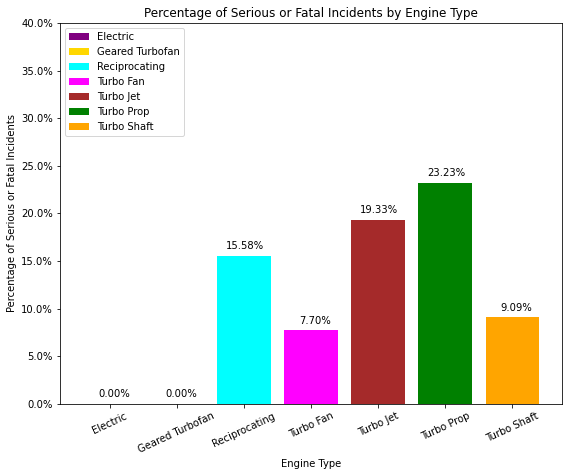

In [24]:
engines = engine_severity_data.index.tolist()
engine_percent_severity = engine_severity_percentage
engine_data_count = engine_data_count

fig, ax = plt.subplots(figsize=(9, 7))

engine_colors = ['purple', 'gold', 'cyan', 'magenta', 'Brown', 'green', 'orange', ]
bars = ax.bar(engines, engine_percent_severity, color=engine_colors, label=engines)

for bar, engine_percent in zip(bars, engine_percent_severity):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() - 0.1, height + 1, f'{engine_percent:.2f}%', 
            ha='right', va='center')
    
#ax.legend()
ax.legend(handles=bars, labels=engines, loc='upper left')

ax.set_title("Percentage of Serious or Fatal Incidents by Engine Type")
ax.set_xlabel("Engine Type")
ax.set_ylabel("Percentage of Serious or Fatal Incidents")
ax.set_ylim(0, 40)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=25)
plt.show()

In [25]:
#aviation_processed.to_csv('Aviation_NonAmateurUPD.csv', index=False)

Now we export this as a CSV file to show in tableau. 

In [26]:
aviation_processed['Amateur.Built'].value_counts()

No    24004
Name: Amateur.Built, dtype: int64

## Recommendation #3: Use a turbo fan plane with multiple engines

Finally, we will introduce our last recommendation which is to use a Turbo fan plane with multiple engines. Before we proceed with our calculation, we will first remove all engines from our data set that aren't Turbo Fan, as that is the type of engine we decided on and will enhance our analysis of the proper number of engines to use. 

In [27]:
aviation_processed = aviation_processed.loc[aviation_processed['Engine.Type'] == "Turbo Fan", aviation_columns]

## Number of engines vs. Injury Severity

To show how we reached this conclusion, we run the same proportional analysis as above, by grouping the data by the "Number.of.Engines" column, finding the summation of each value in "Number.of.Engines" in which the "Injury.Severity" column is equal to "Serious" or starts with the word "Fatal", and setting it equal to a variable enginecount_incident_data. Then we set another variable called enginecount_total_incidents equal to the total number of counts of each value in "Number.of.Engines". Then we find the percentage of each number of engines in which the incident involving an Turbo Fan airplane with that amount of engines was a Serious or Fatal incident and print the answer. 

In [28]:
enginecount_incident_data = aviation_processed.groupby("Number.of.Engines")['Injury.Severity'].apply(
                             lambda x: ((x == "Serious") | (x.str.startswith("Fatal"))).sum())

enginecount_total_incidents = aviation_processed['Number.of.Engines'].value_counts()

enginecount_incident_percentage = (enginecount_incident_data / enginecount_total_incidents) * 100

print("Percentages of Number of Engines with Serious or Fatal incidents")

print(enginecount_incident_percentage.apply(lambda x: f"{x: .2f}%"))

Percentages of Number of Engines with Serious or Fatal incidents
1.0     41.67%
2.0      7.02%
3.0      4.65%
4.0      7.50%
dtype: object


## Number of engines vs. Injury Severity Results

As the results show, single-engine turbo fan airplanes are an outlier and incidents involving them were Serious or Fatal 41.67% of the time. Turbo Fan airplanes with two, three, and four engines were relatively close to each other in terms of risk, coming in at 7.02%, 4.65%, and 7.50% respectivley. Although three-engine aircraft show the lowest severity rate at 4.65%, it's important to note that the difference in severity rate between the three-engine aircraft (4.65%) and both the two-engine (7.02%) and four-engine (7.50%) aircraft is relativley small. Moreover, all engines exhibit significantly lower severity rates than single-engine aircraft (41.67%). Considering the statistical closeness of severity rates between two, three, and four-engine aircrafts, it is prudent to recommend multi-engine turbo fan airplanes for enhanced safety. 

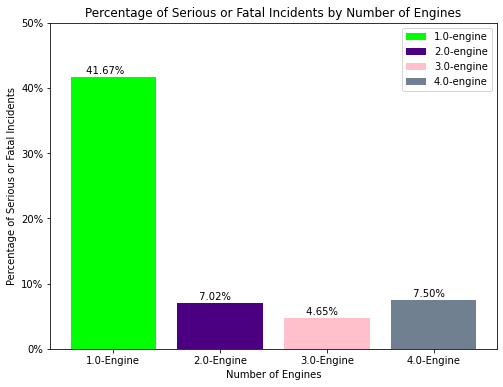

In [29]:
engine_count = enginecount_incident_data.index.tolist()
engine_count_severity_percent = enginecount_incident_percentage
engine_numbers_count = sorted(enginecount_total_incidents)
number_engine_colors = ['lime', 'indigo', 'pink', 'slategray']

fig, ax = plt.subplots(figsize =(8, 6))
engine_count_bars = ax.bar(range(len(engine_count)), engine_count_severity_percent,
                           color=number_engine_colors, label=engine_count)

for engine_bar, engine_number_percent in zip(engine_count_bars, engine_count_severity_percent):
    height = engine_bar.get_height()
    ax.text(engine_bar.get_x() + engine_bar.get_width() - 0.3, height + 1,
            f'{engine_number_percent: .2f}%', ha='right', va='center')
    ax.legend()

ax.set_title("Percentage of Serious or Fatal Incidents by Number of Engines")
ax.set_xlabel("Number of Engines")
ax.set_ylabel("Percentage of Serious or Fatal Incidents")
ax.set_ylim(0, 50)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(range(len(engine_count)), [f'{engine}-Engine' for engine in engine_count])
custom_legend_labels = ['1.0-engine', '2.0-engine', '3.0-engine', '4.0-engine']
ax.legend(engine_count_bars, custom_legend_labels)

    

Now we export this data as a CSV file to show in tableau. 

In [30]:
#aviation_processed.to_csv('Aviation_only_turbofan.csv', index=False)